In [26]:
import json
import pandas as pd
import time
import copy
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
import matplotlib.patches as mpatches

In [2]:

start = time.time()
business = []
with open('business.json','r') as f:
    for lines in f:
        business.append(json.loads(lines))
R = []  ### R[] stores the 5899 restaurants info 
for row in business:
    if row['city'] == 'Las Vegas' and 'Restaurants' in row['categories']:
        R.append([row['business_id'], row['latitude'],row['longitude']])
print(len(R))
print(R[0])
end = time.time()
print("total time", end - start)

5899
['Pd52CjgyEU3Rb8co6QfTPw', 36.0669136, -115.1708484]
total time 5.103943824768066


In [3]:
ID_R = set(i[0] for i in R)
print(len(ID_R))

review = []
with open('review.json','r') as f:
    for lines in f:
        review.append(json.loads(lines))
print(review[0])

5899
{'review_id': 'v0i_UHJMo_hPBq9bxWvW4w', 'user_id': 'bv2nCi5Qv5vroFiqKGopiw', 'business_id': '0W4lkclzZThpx3V65bVgig', 'stars': 5, 'date': '2016-05-28', 'text': "Love the staff, love the meat, love the place. Prepare for a long line around lunch or dinner hours. \n\nThey ask you how you want you meat, lean or something maybe, I can't remember. Just say you don't want it too fatty. \n\nGet a half sour pickle and a hot pepper. Hand cut french fries too.", 'useful': 0, 'funny': 0, 'cool': 0}


In [4]:
rev_d = {}
for row in review:
    bid = row['business_id']
    if bid in ID_R:
        if bid in rev_d:
            rev_d[bid].append(row['text'])
        else:
            rev_d[bid] = [row['text']]

In [7]:
RR = copy.deepcopy(R)
for i in RR:
    b = rev_d[i[0]]
    i.append(b)
print(RR[0][3][0])

Nice, open bar with great views of the strip and golf course.  Patio seating also.  Nice happy hour prices.  Had the carnitas nachos...very good.  And they serve breakfast all day.  Not noisy or smoky


In [8]:
X_vec = [] ### all business with all reviews
for i in RR:
    X_dic = {}
    X_dic['business_id'] = i[0]
    X_dic['latitude'] = i[1]
    X_dic['longitude'] = i[2]
    X_dic['text'] = i[3]
    X_vec.append(X_dic)

In [9]:
k_1000_text = [] #### first 1000 reviews
for row in X_vec:
    text = ','.join(row['text'][:1000])
    k_1000_text.append(text)

In [12]:
### apply PCA for k = 1000
vectorizer1000 = TfidfVectorizer(stop_words='english', min_df=0.2,max_df=0.7)
dtm1000 = vectorizer1000.fit_transform(k_1000_text)
print(type(dtm1000), dtm1000.shape)
terms1000 = vectorizer1000.get_feature_names()
dtm1000_dense = dtm1000.todense()
centered_dtm1000 = dtm1000_dense - np.mean(dtm1000_dense, axis=0)
np.sum(centered_dtm1000,axis=0)[:,:10]

<class 'scipy.sparse.csr.csr_matrix'> (5899, 1711)


matrix([[  1.48284163e-14,   2.96932617e-14,   7.04193648e-14,
          -3.33934269e-16,  -4.20340845e-14,   7.29225708e-14,
          -2.66228012e-13,  -5.33132566e-14,  -4.00322137e-14,
          -3.77666648e-14]])

In [13]:
u1000, s1000, vt1000 = np.linalg.svd(centered_dtm1000)
print(dtm1000.shape)

(5899, 1711)


In [14]:
pd.DataFrame(vt1000,columns=vectorizer1000.get_feature_names())

,00,100,11,12,13,14,15,16,17,18,...,yellow,yelp,yelpers,yes,yesterday,york,young,yum,yummy,zero
0,0.004269,0.005314,0.002851,0.001619,0.002049,-0.000037,0.003263,-0.000218,0.001128,0.000808,...,0.009820,0.014863,0.003264,0.009141,0.002355,-0.017126,0.001930,0.013148,0.014544,-0.000554
1,-0.004960,-0.003672,-0.003262,-0.006150,-0.004081,-0.005601,-0.011095,-0.005272,-0.001409,-0.009484,...,-0.016497,-0.017609,-0.004702,-0.004318,0.001074,-0.013084,0.000891,-0.018918,-0.015339,0.004219
2,0.003376,0.003301,0.006394,0.006724,0.004000,0.003587,0.017344,0.003729,0.003870,0.002260,...,-0.013344,-0.011484,-0.001610,0.006728,0.000853,0.005490,0.003504,-0.012103,-0.007649,0.004025
3,-0.011306,-0.008601,0.001163,-0.005175,-0.002891,-0.004972,-0.008804,-0.005127,-0.002312,-0.007950,...,0.009925,-0.001726,-0.000843,-0.006953,0.003904,-0.006363,0.010494,0.002461,-0.004265,0.003084
4,0.002902,0.000319,0.005263,0.004073,0.002087,0.002722,-0.000365,0.002798,0.000550,0.002114,...,-0.004322,0.003455,0.000268,0.002495,0.002633,0.012288,0.001114,-0.001485,0.007664,-0.000897
5,-0.003194,0.003996,-0.001804,-0.002772,-0.002512,-0.004141,-0.013567,-0.003530,-0.001918,-0.001728,...,-0.003933,-0.017267,-0.002777,-0.006925,-0.001310,-0.015595,0.004466,-0.013185,-0.021369,-0.000947
6,0.000992,-0.001683,0.000606,-0.004514,-0.002031,-0.002311,0.010274,-0.003312,-0.000542,-0.002329,...,-0.005638,-0.012873,-0.002815,-0.002270,-0.003141,-0.009325,0.000757,-0.015334,-0.019328,0.002506
7,-0.004406,0.006123,-0.007070,-0.004894,-0.002391,0.001433,-0.019892,0.001313,0.000117,0.001315,...,-0.006823,-0.017647,-0.002110,-0.004362,-0.002720,-0.000334,-0.006747,-0.005868,-0.011036,-0.001479
8,0.002602,0.003853,0.007528,0.007812,0.002312,0.000242,0.037442,0.003703,0.006206,0.003260,...,0.011091,0.008592,0.002487,0.010022,0.008096,-0.011483,0.018153,0.013047,0.009210,0.018099
9,-0.009665,-0.007936,-0.007162,-0.008310,0.002270,-0.000048,-0.050290,-0.006255,-0.006146,-0.001490,...,0.008263,0.011636,0.003866,-0.011265,-0.009374,0.009996,-0.028316,0.014111,0.018235,-0.024871


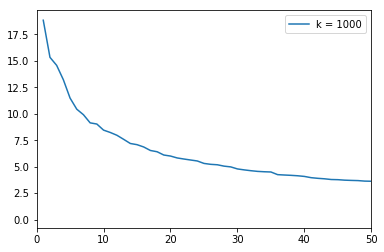

In [15]:
plt.xlim([0,50])
plt.plot(range(1,len(s1000)+1),s1000,label = "k = 1000")
plt.legend()

In [18]:
xk1000 = u1000[:,:8] @ np.diag(s1000[:8])
ll = []
for i in range(len(R)):
    temp = []
    temp.append(R[i][1])
    temp.append(R[i][2])
    ll.append(temp)
scaler = MinMaxScaler(feature_range=(1, 20),copy = True)
print(scaler.fit(ll))
ll = scaler.transform(ll)
print(ll)
### ll is a list contain latitude and longitude
temp = np.asarray(ll)
print(type(temp))
Xk1000 = np.hstack((xk1000,temp))
print(Xk1000[0])

MinMaxScaler(copy=True, feature_range=(1, 20))
[[  6.44648411  13.33643754]
 [  6.36214441  14.59471545]
 [  6.49664542  13.14177341]
 ..., 
 [ 14.05850642  11.06827947]
 [  7.68299143  14.3912012 ]
 [  7.49700021  10.28311005]]
<class 'numpy.ndarray'>
[[  0.02475821   0.03647416   0.1638747   -0.03875725  -0.06658664
    0.02089062   0.12154358  -0.0525798    6.44648411  13.33643754]]


### k means

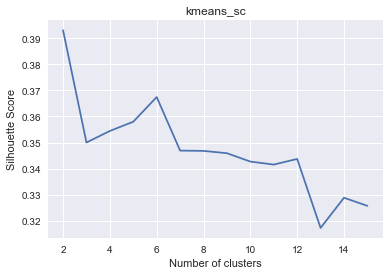

In [21]:
def sc_evaluate_clusters(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean')
    plt.plot(range(2,len(s)),s[2:],label = str(X))
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('kmeans_sc')
    
sc_evaluate_clusters(Xk1000,15)

In [38]:
k = 6
kmeans1000 = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
labels1000 = kmeans1000.fit_predict(Xk1000)
centroids1000 = kmeans1000.cluster_centers_
def kmeans_find_center(centroids10,vt10):
    bt10 = centroids10[:,:8] @ vt10[:8,:]
    bt10 = np.asarray(bt10)
    order_centroids = bt10.argsort()[:, ::-1]
    return order_centroids
order_centroids1000 = kmeans_find_center(centroids1000, vt1000)

In [39]:
def kmeans_plt(Xk10,order_centroids10,terms10,labels10,centroids10,k):
    cluster = []
    for i in range(6):
        temp = []
#         print("Cluster %d:" % i, end='')
        for ind in order_centroids10[i,:5]:
            temp.append(terms10[ind])
#             print(' %s' % terms10[ind], end='')
#         print('\n')
        cluster.append(temp)
    colors = ['rbgykw'[p] for p in labels10]
    red_patch = mpatches.Patch(color='red', label=cluster[0])
    blue_patch = mpatches.Patch(color='blue', label=cluster[1])
    green_patch = mpatches.Patch(color='green', label=cluster[2])
    yellow_patch = mpatches.Patch(color='yellow', label=cluster[3])
    black_patch = mpatches.Patch(color='black', label=cluster[4])
    white_patch = mpatches.Patch(color='white', label=cluster[5])
    plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, black_patch,white_patch])
#     plt.scatter(centroids10[:, 8], centroids10[:, 9], c='red', s=50, alpha=0.5);
    plt.title('Clustering Results with KMeans'+ '   k='+ str(k))
    plt.ylabel('longitude')
    plt.xlabel('latitude')
    _ = plt.scatter(np.asarray(Xk10[:, 8]), np.asarray(Xk10[:, 9]), color=colors, s=3)
    plt.show()

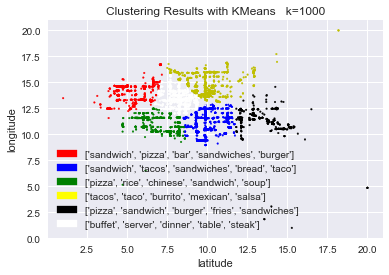

In [40]:
kmeans_plt(Xk1000,order_centroids1000,terms1000,labels1000,centroids1000,1000)

### cluster by document terms.

Goal: cluster the reviews of the restaurants, extracting categories in an unsupervised fashion.

First, we create a vector list to store the business_id with its 3 features extracted through business.json and review.json. The features are latitude, longitude and all the reviews of the business_id.

Then, we use Latent Semantic Analysisi(LSA) on the reviews to cluster restaurants. We take into account the first 1000 reviews per business, compute the document-term matrix dtm and apply principle component analysis(PCA) to it. We choose to ignore terms that appear in more than 70% and less than 20% of the documents. Use use sklearn.decomposition.TruncatedSVD() to sparse the data. Inorder to improvec our clustering accuracy, we exclude the less significant concepts from the documents' feature vectors. That is, we will choose the leftmost k columns of U and the topmost k row of V^T. The reduced set of columns of U are our new document encodings, and it is those that we will cluster. And throuth the picture, 8 is a reasonable number for principle component.

Next, we visualize the clusters by plotting the longitude/latitude of the restaurants in a scatter plot and label each cluster. For getting clusters we use the method kmeans++. By evaluate Silhouette Coefficient. Higher Silhouette Coefficient score relates to a model with "better defined" clusters. From the plot, 6 is a local maximum in the Silhouette Coefficient as the potential number of clusters. For labeling each cluster, we calculate frequency of terms in each cluster and get the most frequent 5 words to represent the cluster.



